In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

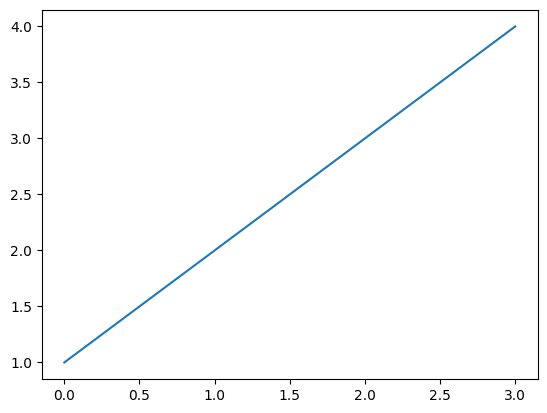

In [2]:
plt.plot([1, 2, 3, 4]);

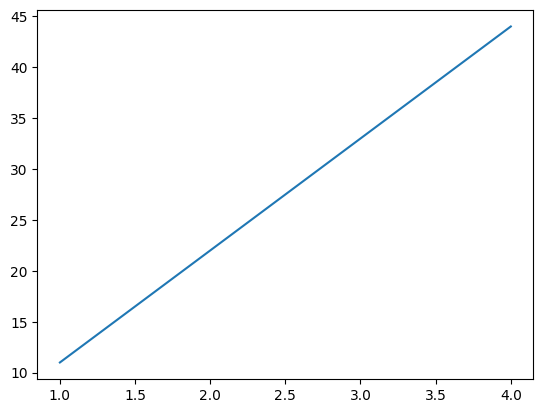

In [3]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

plt.plot(x, y);

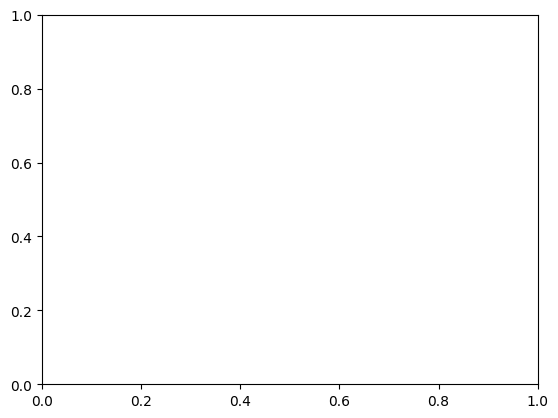

In [4]:
# 1st method
fig = plt.figure()  #Creates a figure
ax = fig.add_subplot() # adds some axes
plt.show()

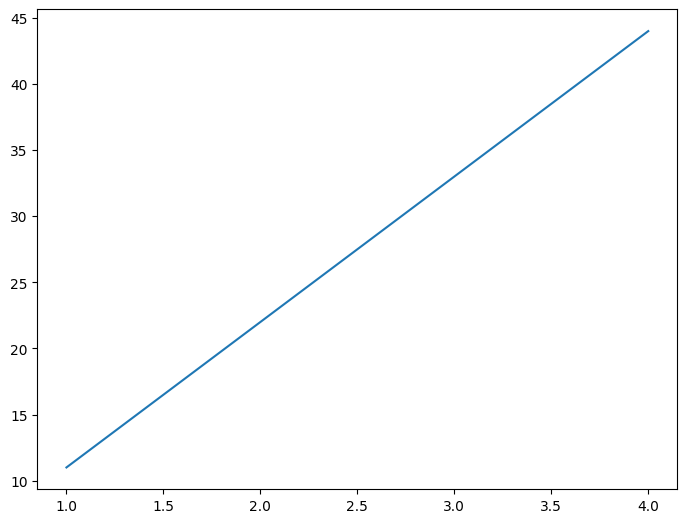

In [5]:
# 2nd method
fig = plt.figure() # Creates a figure
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y)
plt.show()

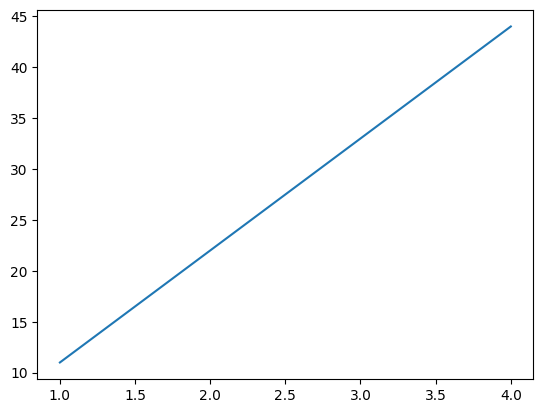

In [6]:
#3rd method
fig, ax = plt.subplots()
ax.plot(x, y);

## Matplotlib Workflow

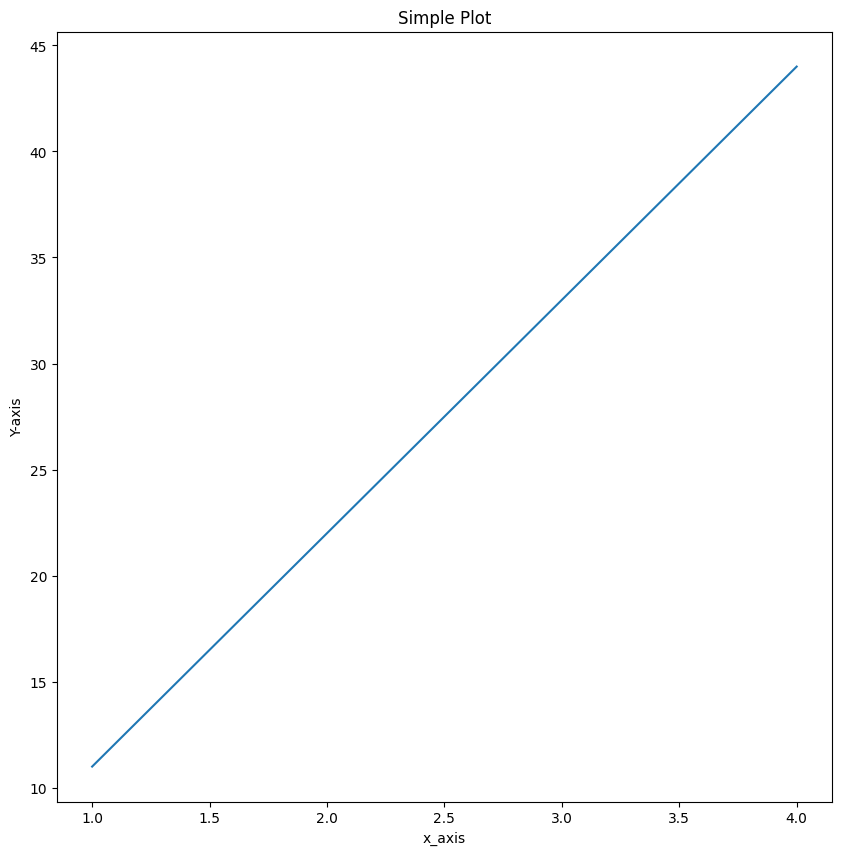

In [7]:
# 0. Import matplotlib and get it ready for plotting in jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare Data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup Plot
fig, ax = plt.subplots(figsize=(10, 10))  # (Width, Height)

# 3. Plot data
ax.plot(x, y)

# 4. Customize Plot
ax.set(title="Simple Plot",
       xlabel="x_axis",
       ylabel="Y-axis")

# 5. Save & show 
fig.savefig("../images/sample-plot.png")

## Making figures with NumPy arrays

We want:
* Line Plot
* Scatter Plot
* Bar Plot
* Histogram
* Subplots

In [8]:
import numpy as np

In [9]:
# Creates some data
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

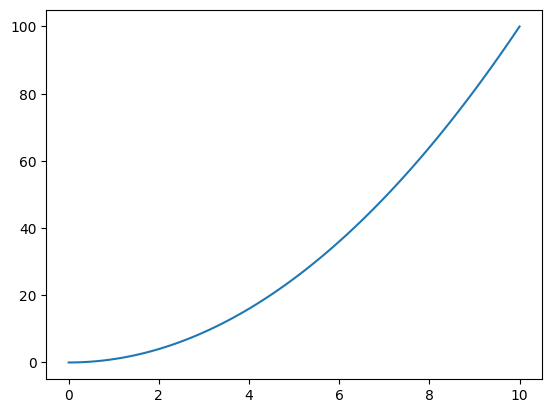

In [10]:
# Plot the data and create a line plot
fig, ax = plt.subplots()
ax.plot(x, x**2)

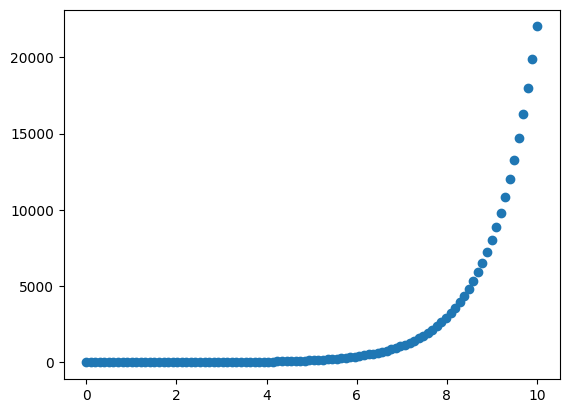

In [11]:
# Scatter Plot
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x))

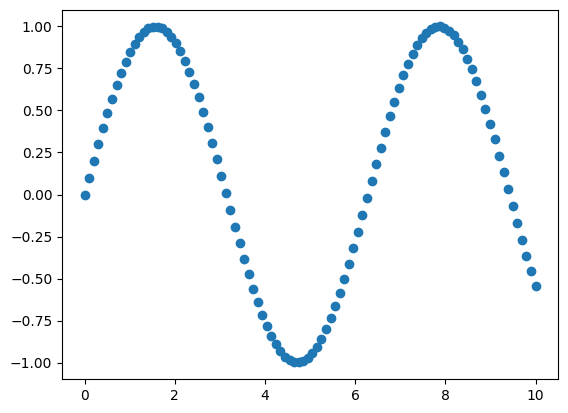

In [12]:
# Another Scatter Plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

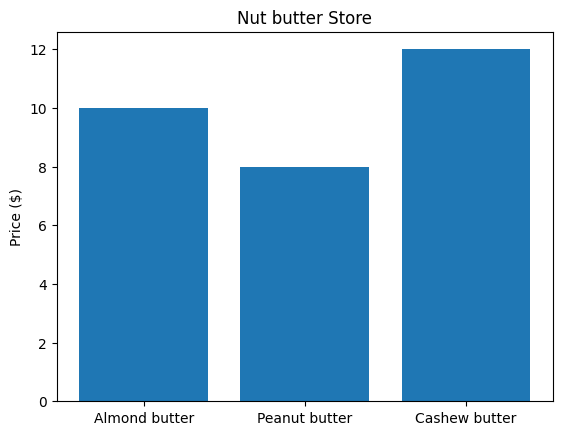

In [13]:
# Make a plot from dictionary
nut_butter_prices = {"Almond butter": 10, 
                     "Peanut butter": 8,
                     "Cashew butter": 12}

fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values()) # (x, height)
ax.set(title="Nut butter Store",
       ylabel="Price ($)");

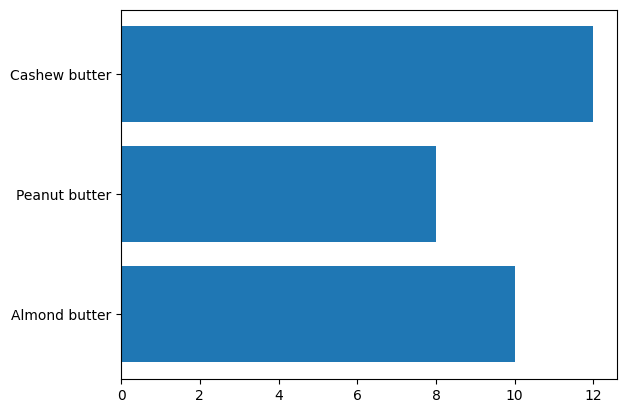

In [14]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values())); # Horizontal Bars

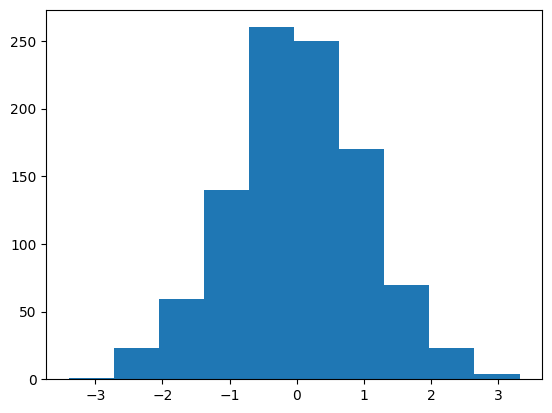

In [15]:
# Histogram
x = np.random.randn(1000)
fix, ax = plt.subplots()
ax.hist(x);

### Two options for subplots

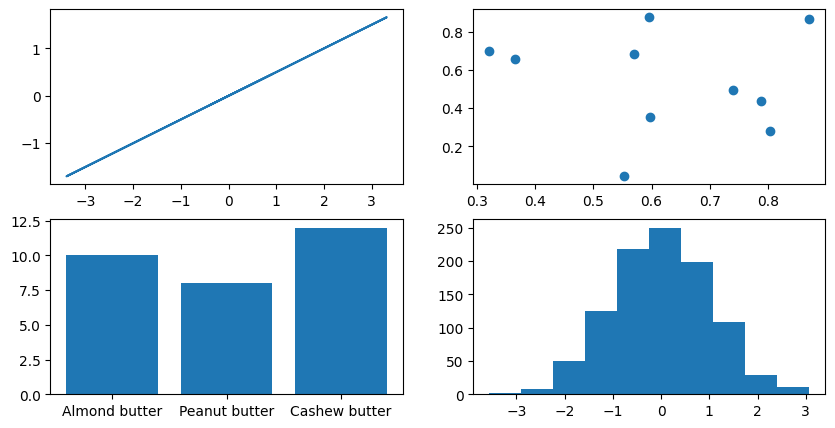

In [16]:
# Subplots option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                             ncols=2,
                                             figsize=(10, 5))

ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

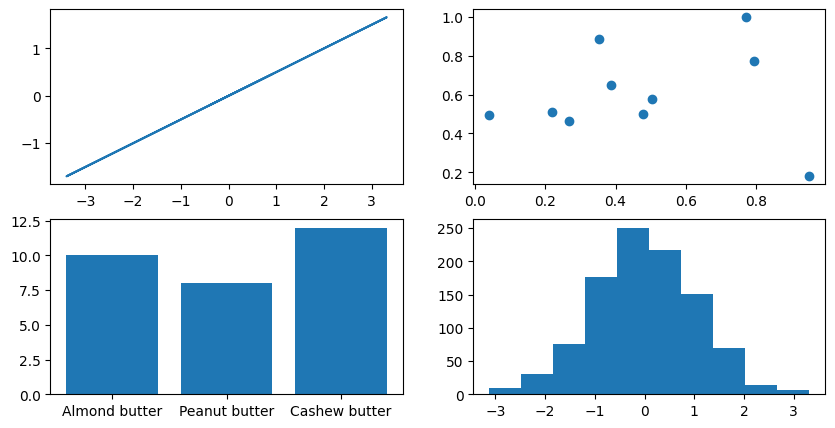

In [17]:
# Subpltots option 2
fig, ax = plt.subplots(nrows=2,
                       ncols=2,
                       figsize=(10, 5))
# Plot to each different axis
ax[0, 0].plot(x, x/2);
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1, 1].hist(np.random.randn(1000));

## Plotting from pandas DataFrames

In [18]:
# Make a DataFrame
car_sales = pd.read_csv("../data/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


<Axes: >

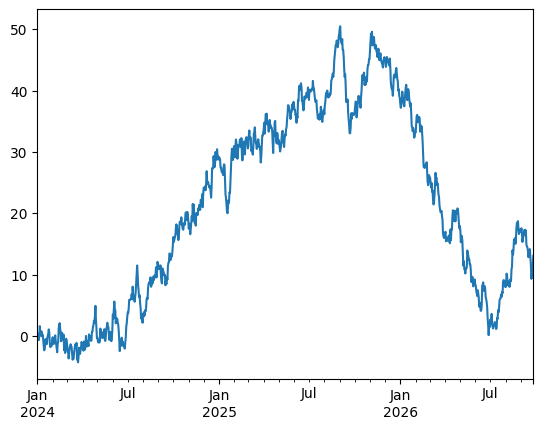

In [19]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range("1/1/2024", periods=1000))

ts = ts.cumsum()  # [2, 4, 6] => [2, 6, 12]

ts.plot()

In [20]:
car_sales["Price"] = car_sales["Price"].replace('[\$\,\.]', '', regex=True)
car_sales["Price"] = pd.to_numeric(car_sales["Price"])
car_sales["Price"] = car_sales["Price"] / 100
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000.0
1,Honda,Red,87899,4,5000.0
2,Toyota,Blue,32549,3,7000.0
3,BMW,Black,11179,5,22000.0
4,Nissan,White,213095,4,3500.0
5,Toyota,Green,99213,4,4500.0
6,Honda,Blue,45698,4,7500.0
7,Honda,Blue,54738,4,7000.0
8,Toyota,White,60000,4,6250.0
9,Nissan,White,31600,4,9700.0


In [21]:
car_sales["Sale Date"] = pd.date_range("1/1/2024", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000.0,2024-01-01
1,Honda,Red,87899,4,5000.0,2024-01-02
2,Toyota,Blue,32549,3,7000.0,2024-01-03
3,BMW,Black,11179,5,22000.0,2024-01-04
4,Nissan,White,213095,4,3500.0,2024-01-05
5,Toyota,Green,99213,4,4500.0,2024-01-06
6,Honda,Blue,45698,4,7500.0,2024-01-07
7,Honda,Blue,54738,4,7000.0,2024-01-08
8,Toyota,White,60000,4,6250.0,2024-01-09
9,Nissan,White,31600,4,9700.0,2024-01-10


In [22]:
car_sales["Total Sales"] = car_sales["Price"].cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000.0,2024-01-01,4000.0
1,Honda,Red,87899,4,5000.0,2024-01-02,9000.0
2,Toyota,Blue,32549,3,7000.0,2024-01-03,16000.0
3,BMW,Black,11179,5,22000.0,2024-01-04,38000.0
4,Nissan,White,213095,4,3500.0,2024-01-05,41500.0
5,Toyota,Green,99213,4,4500.0,2024-01-06,46000.0
6,Honda,Blue,45698,4,7500.0,2024-01-07,53500.0
7,Honda,Blue,54738,4,7000.0,2024-01-08,60500.0
8,Toyota,White,60000,4,6250.0,2024-01-09,66750.0
9,Nissan,White,31600,4,9700.0,2024-01-10,76450.0


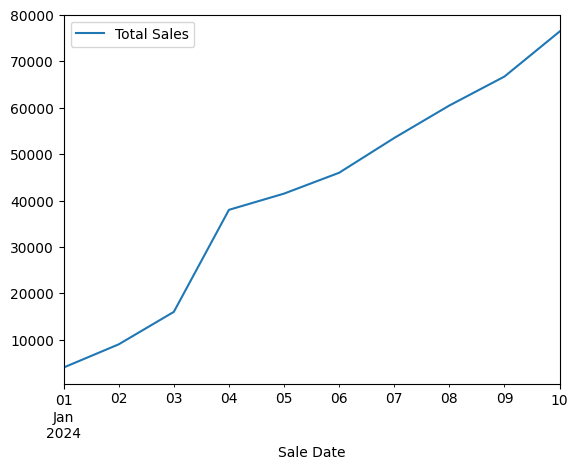

In [23]:
car_sales.plot(x="Sale Date", y="Total Sales");

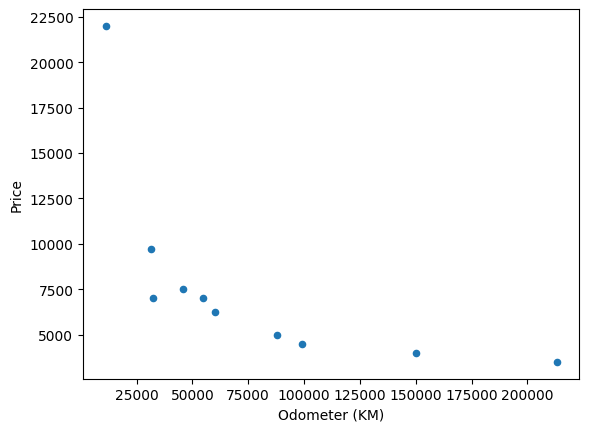

In [24]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [25]:
x = np.random.rand(10, 4) 
x.shape, x

# Turn it into a DataFrame
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.813856,0.708509,0.951353,0.167362
1,0.901096,0.755492,0.848830,0.841254
2,0.865003,0.511008,0.133098,0.946454
3,0.022089,0.474569,0.234465,0.345578
4,0.052625,0.545805,0.586670,0.962408
5,0.758556,0.166493,0.061405,0.638144
6,0.504463,0.785192,0.478443,0.603047
7,0.176920,0.262863,0.260182,0.008043
8,0.217622,0.397569,0.351526,0.262281
9,0.808353,0.733015,0.624578,0.198669


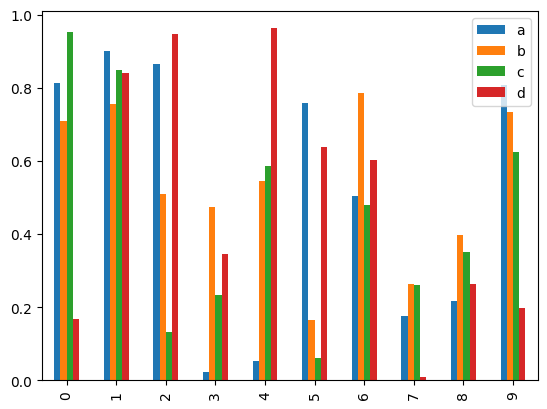

In [26]:
df.plot.bar();

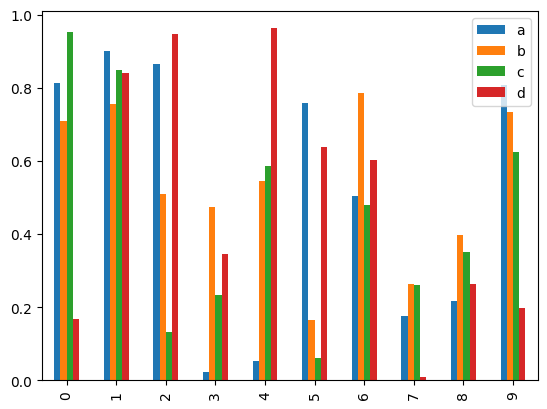

In [27]:
df.plot(kind="bar");

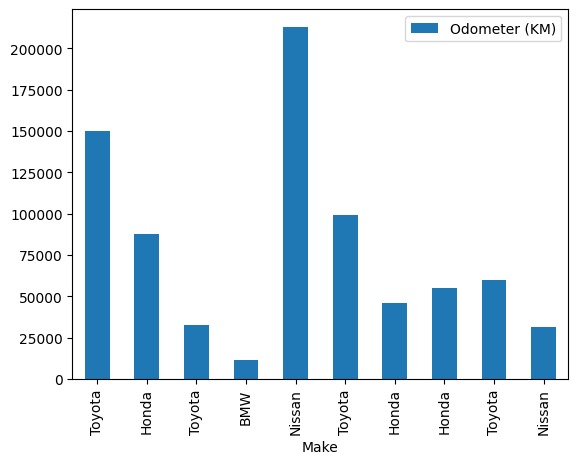

In [28]:
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar");

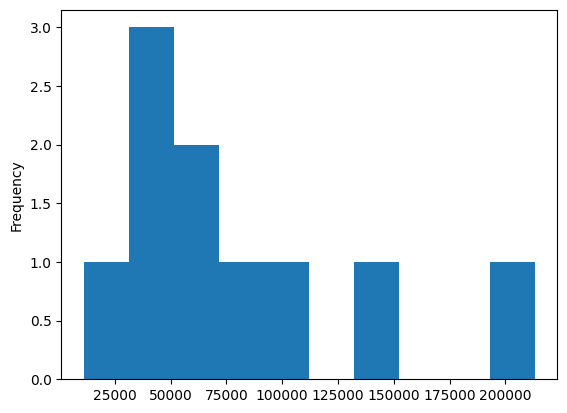

In [29]:
# Histogram

car_sales["Odometer (KM)"].plot.hist();

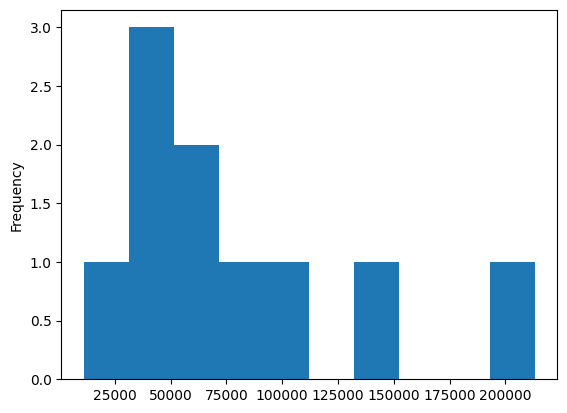

In [30]:
car_sales["Odometer (KM)"].plot(kind="hist");

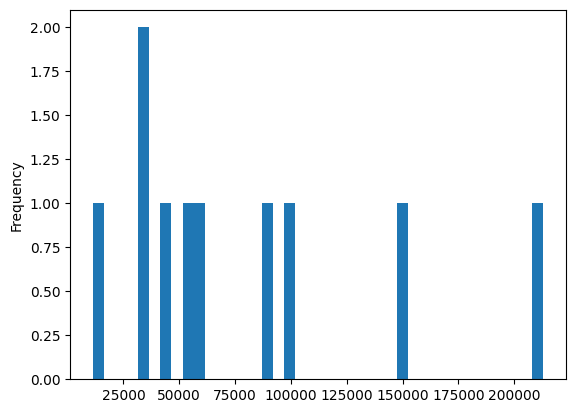

In [31]:
car_sales["Odometer (KM)"].plot.hist(bins=40);
# The bins=40 parameter specifies that the data from the "Odometer (KM)" column should be divided into 40 intervals or bins.

In [32]:
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: ylabel='Frequency'>

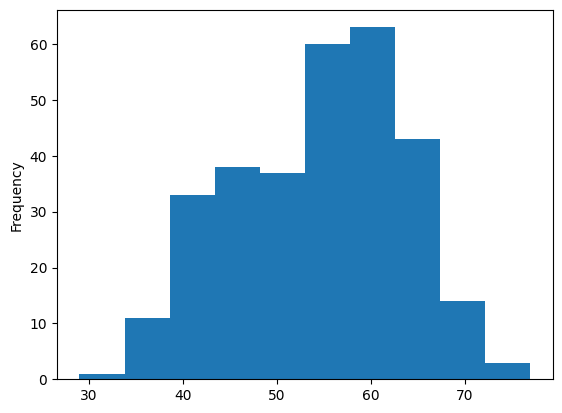

In [33]:
# Create a histogram of age
heart_disease["age"].plot.hist()

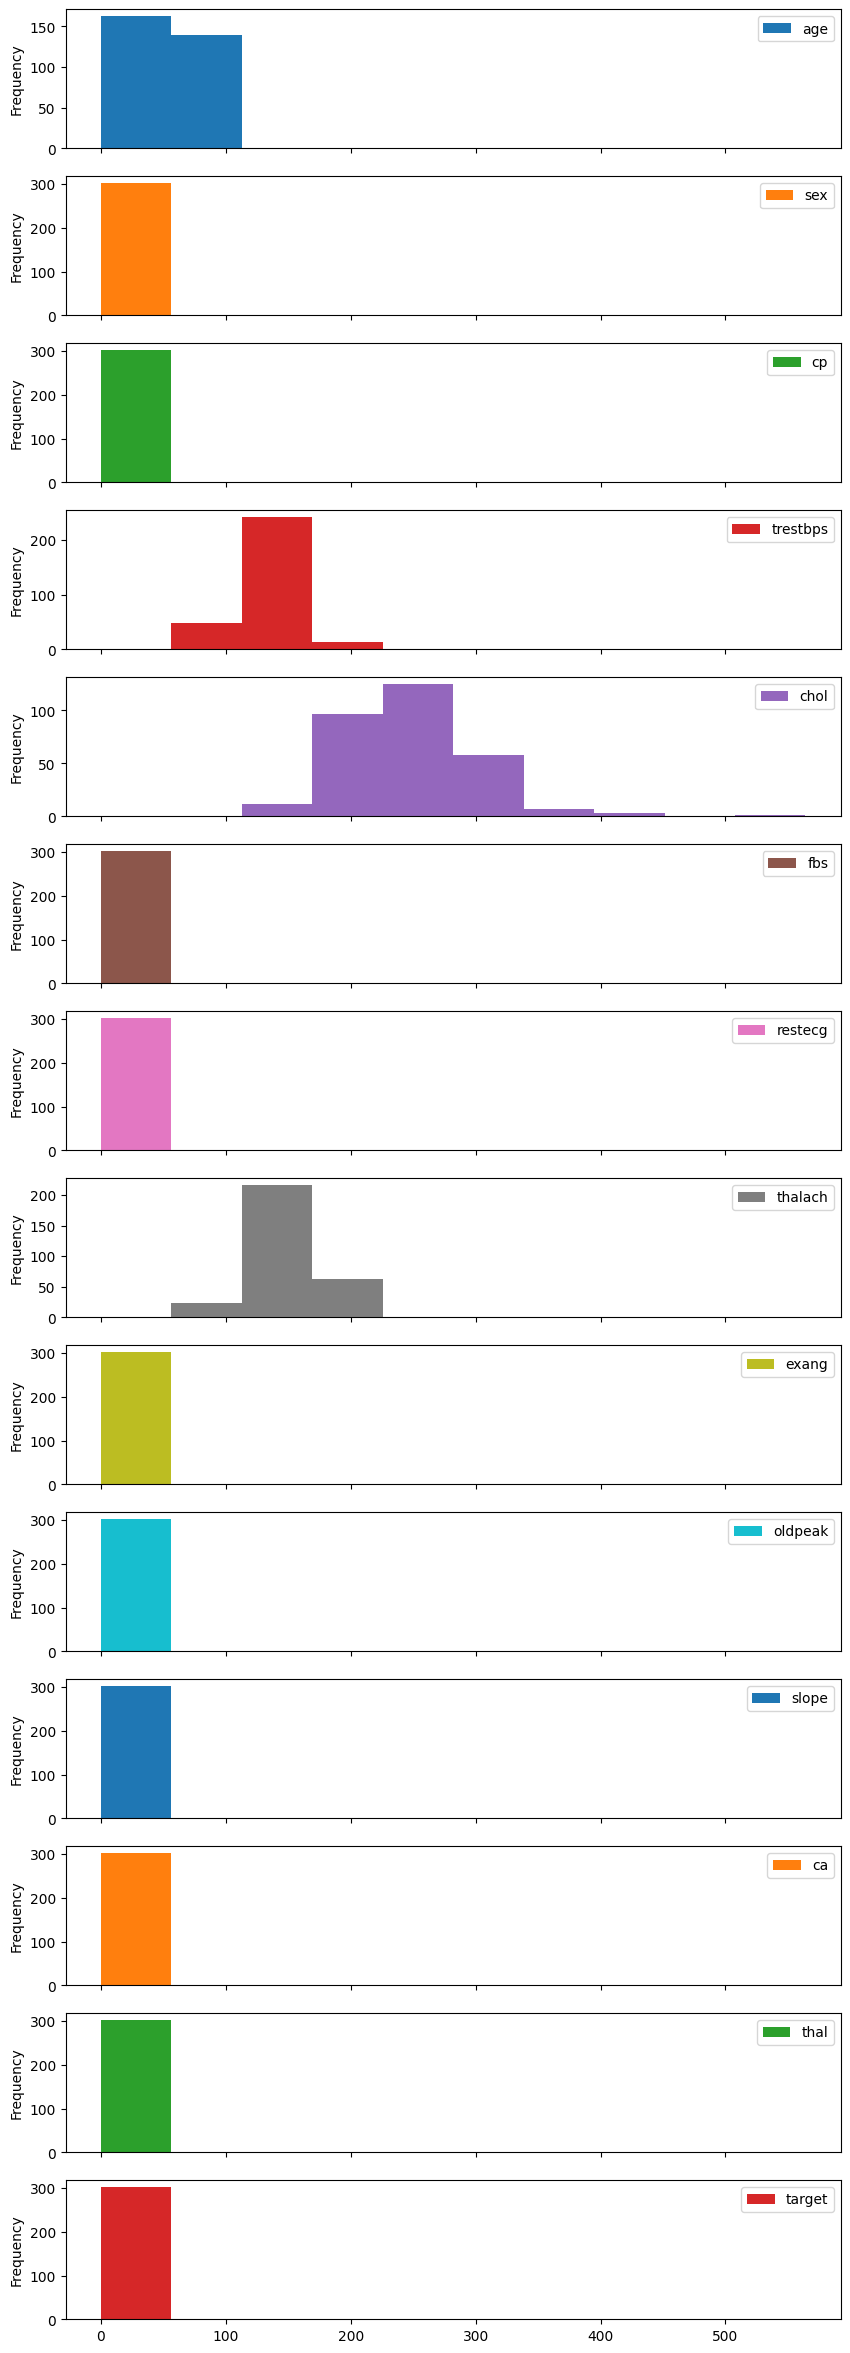

In [34]:
heart_disease.plot.hist(figsize=(10, 30), subplots=True);

### Which one should we use? (pyplot vs matplotlib OO method?)

* When plotting something quickly, okey to use the pyplot method.
* When plotting something advance use OO method

In [35]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


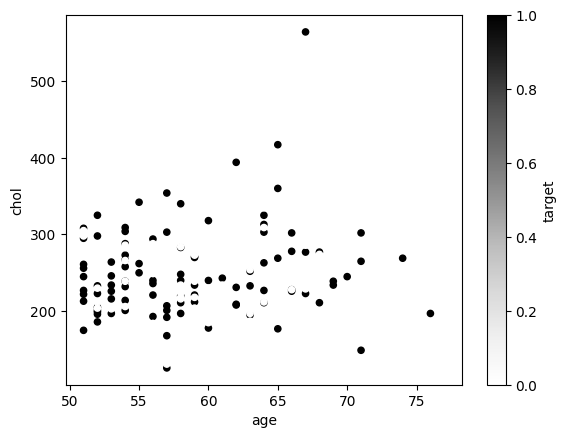

In [36]:
# Pyplot method
over_50.plot(kind='scatter',
             x='age',
             y='chol',
             c='target');

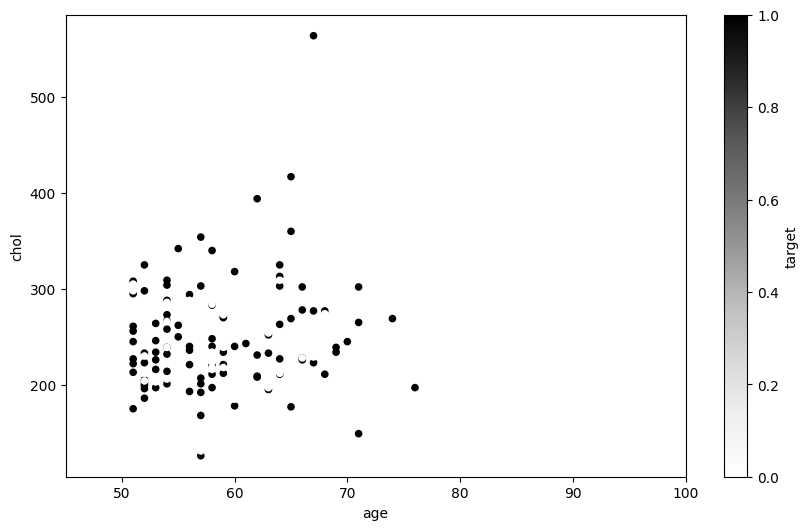

In [37]:
# OO method mixed with pyplot method
fix, ax = plt.subplots(figsize=(10, 6))
over_50.plot(kind='scatter',
             x='age',
             y='chol',
             c='target',
             ax=ax);

ax.set_xlim([45, 100]);

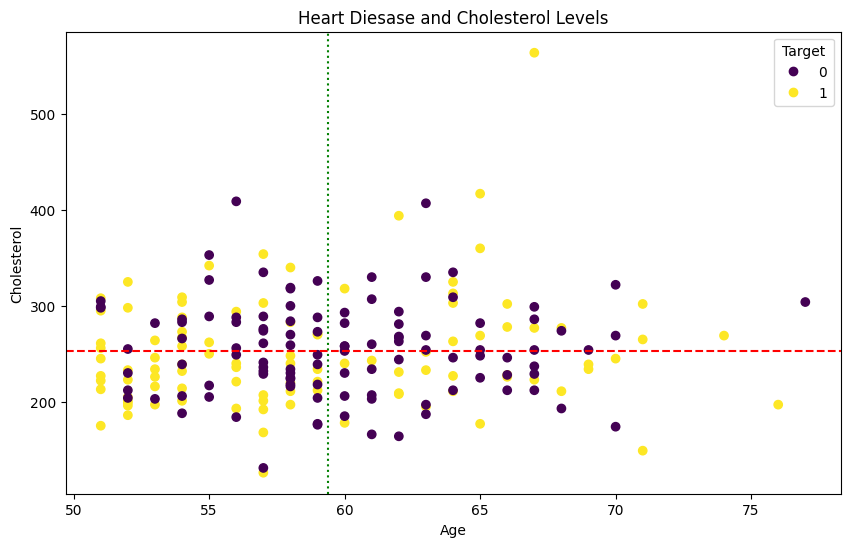

In [38]:
# OO method from scratch
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"]);

# Customize the plot
ax.set(title="Heart Diesase and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");

# Add a horizontal line
ax.axhline(over_50["chol"].mean(),
           linestyle='--',
           color='r');

ax.axvline(over_50["age"].mean(),
           linestyle='dotted',
           color="green");

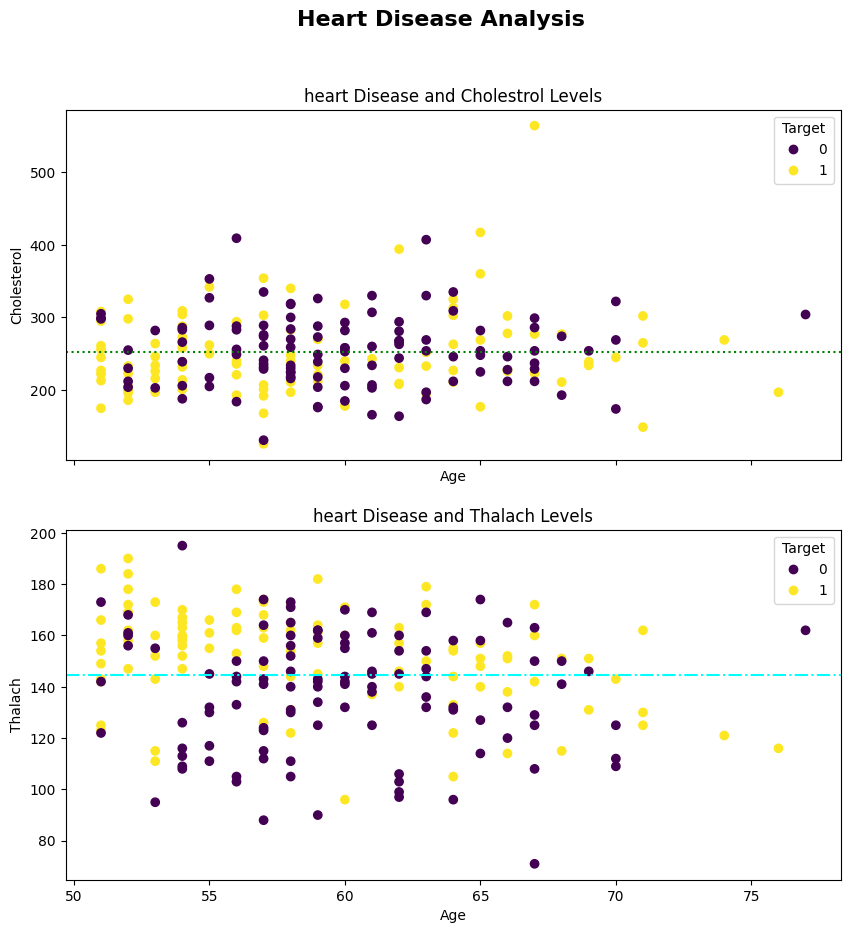

In [41]:
# Subplot of chol, age, thelach
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               figsize=(10, 10),
                               sharex=True)

# Add Data to ax0
scatter = ax0.scatter(x=over_50["age"],
                      y=over_50["chol"],
                      c=over_50["target"])

# Customize ax0
ax0.set(title="heart Disease and Cholestrol Levels", 
        xlabel="Age",
        ylabel="Cholesterol")

# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax0.axhline(over_50["chol"].mean(),
            linestyle="dotted",
            color="green");

# Add Data to ax1
scatter = ax1.scatter(x=over_50["age"],
                      y=over_50["thalach"],
                      c=over_50["target"]);

# Customize ax1
ax1.set(title="heart Disease and Thalach Levels",
        xlabel="Age",
        ylabel="Thalach")

#Add a legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax1.axhline(over_50["thalach"].mean(),
            linestyle="dashdot",
            color="cyan");

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");

## Customizing matplotlib plots and getting stylish

In [43]:
# See the different style available
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [44]:
plt.style.use("seaborn-v0_8-whitegrid")

<Axes: >

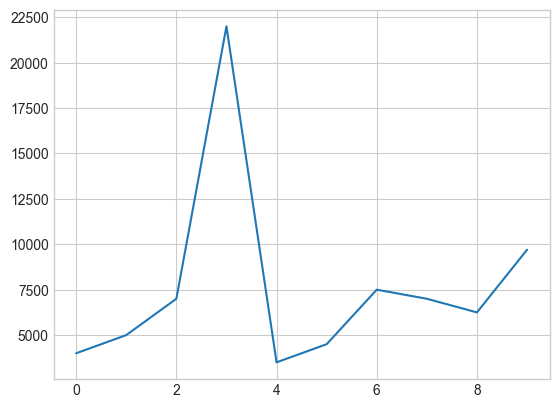

In [45]:
car_sales["Price"].plot()

In [46]:
plt.style.use("dark_background")

<Axes: >

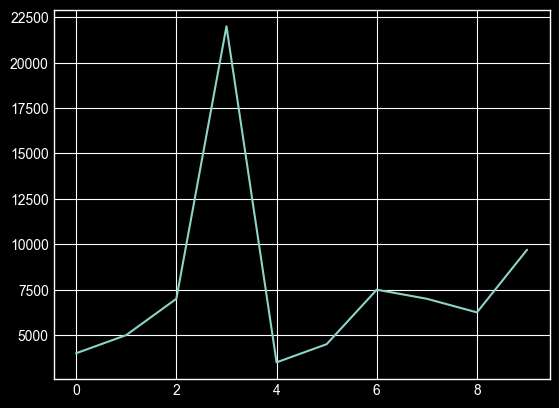

In [47]:
car_sales["Price"].plot()

In [48]:
plt.style.use("tableau-colorblind10")

<Axes: >

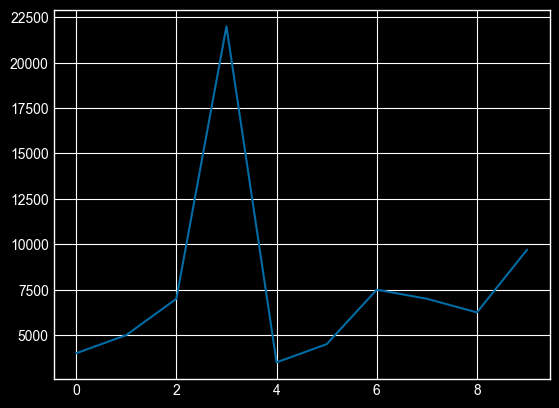

In [49]:
car_sales["Price"].plot()

<Axes: xlabel='Odometer (KM)', ylabel='Price'>

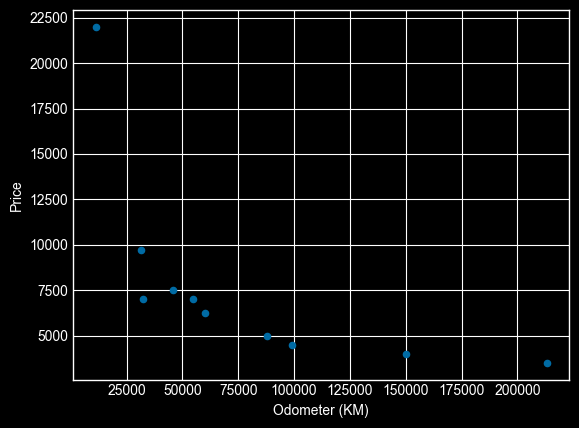

In [50]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter")

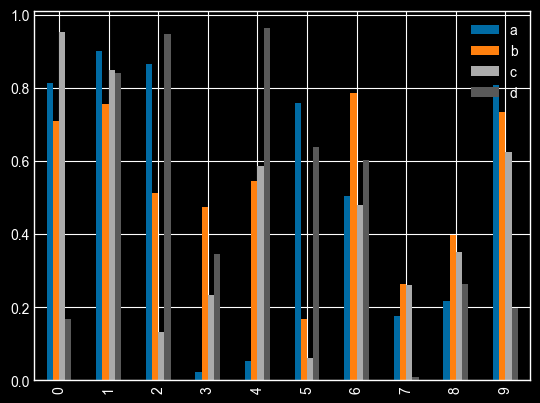

In [51]:
ax = df.plot(kind='bar')

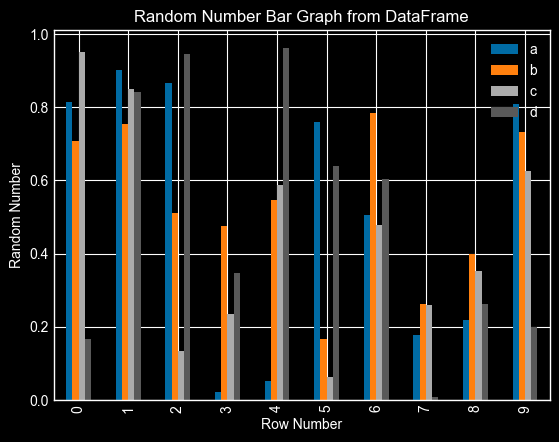

In [61]:
# Customizr our plot with the set() method
ax = df.plot(kind='bar')

# Add some labels and a title
ax.set(title="Random Number Bar Graph from DataFrame",
       xlabel="Row Number",
       ylabel="Random Number")

# Make the legend visible
ax.legend().set_visible(True)

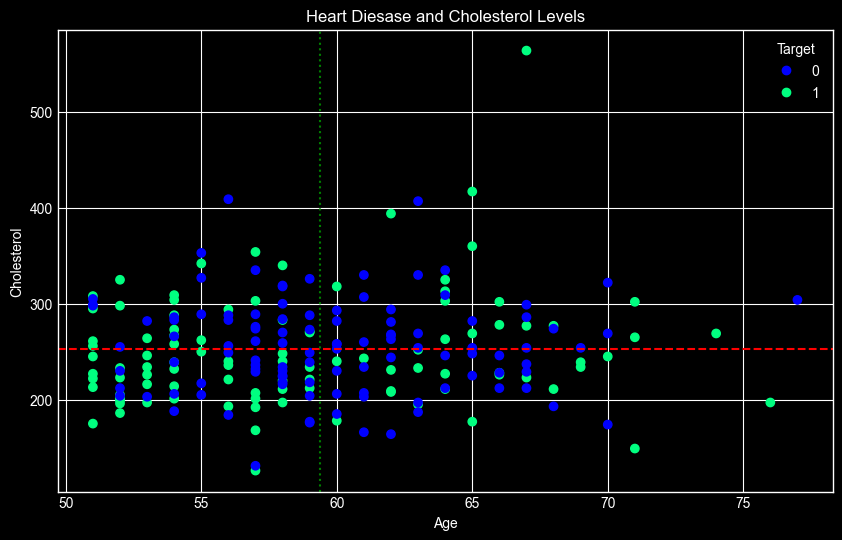

In [65]:
# OO method from scratch
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"],
                     cmap="winter"); # This changes the color scheme

# Customize the plot
ax.set(title="Heart Diesase and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");

# Add a horizontal line
ax.axhline(over_50["chol"].mean(),
           linestyle='--',
           color='r');

ax.axvline(over_50["age"].mean(),
           linestyle='dotted',
           color="green");

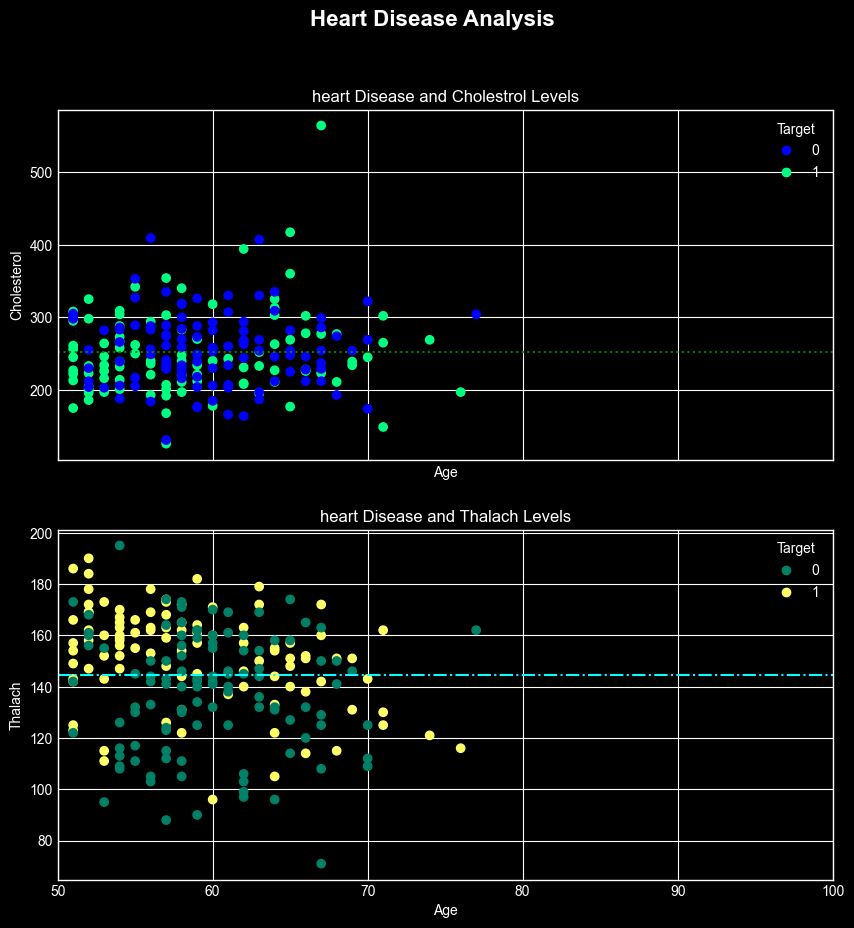

In [69]:
# Customizing the y and x limitations

# Subplot of chol, age, thelach
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               figsize=(10, 10),
                               sharex=True)

# Add Data to ax0
scatter = ax0.scatter(x=over_50["age"],
                      y=over_50["chol"],
                      c=over_50["target"],
                      cmap="winter")

# Customize ax0
ax0.set(title="heart Disease and Cholestrol Levels", 
        xlabel="Age",
        ylabel="Cholesterol")

# Change the x axis limits
ax0.set_xlim([50, 100])

# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax0.axhline(over_50["chol"].mean(),
            linestyle="dotted",
            color="green");

# Add Data to ax1
scatter = ax1.scatter(x=over_50["age"],
                      y=over_50["thalach"],
                      c=over_50["target"],
                      cmap="summer");

# Customize ax1
ax1.set(title="heart Disease and Thalach Levels",
        xlabel="Age",
        ylabel="Thalach")

#Add a legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax1.axhline(over_50["thalach"].mean(),
            linestyle="dashdot",
            color="cyan");

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");

In [70]:
fig.savefig("../images/heart-diseases-analysis-plot.png")